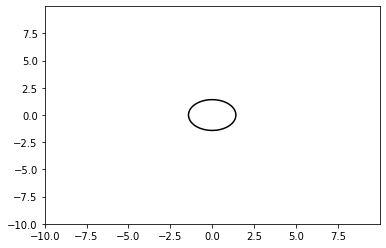

In [72]:
#导入模块
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#建立步长为0.01，即每隔0.01取一个点
step = 0.01
x = np.arange(-10,10,step)
y = np.arange(-10,10,step)
#也可以用x = np.linspace(-10,10,100)表示从-10到10，分100份

#将原始数据变成网格数据形式
X,Y = np.meshgrid(x,y)
#写入函数，z是大写
Z = X**2+Y**2
line_lv = [2]
#只画z=20和40的线，并将颜色设置为黑色
contour = plt.contour(X,Y,Z,levels=line_lv,colors='k')





In [73]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [74]:

t1 = np.linspace(-1, 1.5, 1000)
t2 = np.linspace(-1, 1.5, 1000)
threshhold = 2 * 10**-3
theta = np.ones(21)

print(threshhold)

cordinates = [(x, y) for x in t1 for y in t2]
list(cordinates)
x_cord, y_cord = zip(*cordinates)
mapped_cord = feature_mapping(x_cord, y_cord, 5)  # this is a dataframe

inner_product = mapped_cord.as_matrix() @ theta

decision = mapped_cord[np.abs(inner_product) < threshhold]

print(decision)


0.002
        f00       f10       f01       f20       f11       f02           f30  \
399     1.0 -1.000000 -0.001502  1.000000  0.001502  0.000002 -1.000000e+00   
400     1.0 -1.000000  0.001001  1.000000 -0.001001  0.000001 -1.000000e+00   
1396    1.0 -0.997497 -0.009009  0.995001  0.008986  0.000081 -9.925113e-01   
1397    1.0 -0.997497 -0.006507  0.995001  0.006490  0.000042 -9.925113e-01   
2393    1.0 -0.994995 -0.016517  0.990015  0.016434  0.000273 -9.850600e-01   
...     ...       ...       ...       ...       ...       ...           ...   
394002  1.0 -0.014014 -0.994995  0.000196  0.013944  0.990015 -2.752248e-06   
396001  1.0 -0.009009 -0.997497  0.000081  0.008986  0.995001 -7.311914e-07   
397001  1.0 -0.006507 -0.997497  0.000042  0.006490  0.995001 -2.754505e-07   
399000  1.0 -0.001502 -1.000000  0.000002  0.001502  1.000000 -3.385145e-09   
400000  1.0  0.001001 -1.000000  0.000001 -0.001001  1.000000  1.003006e-09   

             f21       f12           f03  ...

D:\pycharm\pro\test\venv\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
